# MIT Applied Data Science Program - Week 1

#### Week 1 consists of video training and a 2 hour mentored session that covered the basics of python for data science.

Contents:

1. [Imports And Reads](#imports)
2. [Array](#array)
3. [Series](#series)
4. [Data Frame](#data_frame)
    1. [Pivot Table](#pivot_table)
5. [Visualizations](#visualizations)

------



# <a id='imports'>Imports And Reads</a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

    

numpy version:  1.21.0
pandas version:  1.3.1


In [2]:
#downloaded this dataset in csv format from Havard on 8/10/2021
countyResults = pd.read_csv('..\Public_Datasets\countypres_2000-2020.csv')
countyResults.head()


,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,PRESIDENT,AL GORE,DEMOCRAT,13997.0,56480.0,20191203,TOTAL


# <a id='array'>Array</a>

A numpy array object is a matrix as opposed to a list. A numpy array can have many different data types: int32, U8, bool, etc..


In [3]:
weights = [57, 69, 54, 65 ,71, 62, 56]
array = np.array(weights)
print(array)
print('list object ', type(weights))
print('of nparray ', array.dtype)

[57 69 54 65 71 62 56]
list object  <class 'list'>
of nparray  int32


A two-dimensional array needs double square brackets. 

In [4]:
npa2d = np.array([[1,2,3,4], [4,5,9,10]])
print(npa2d)
print('first list, items 1 to second to last item: ', npa2d[0][1:-1])
print('second list, every other item from start: ', npa2d[0][::2])

npal2d = np.array([[1,2,3,4], [4,5,9]], dtype=object)
print(npal2d)
print('first list and second item: ', npal2d[0][1])
print('shape of nparray: ',npal2d.shape)

[[ 1  2  3  4]
 [ 4  5  9 10]]
first list, items 1 to second to last item:  [2 3]
second list, every other item from start:  [1 3]
[list([1, 2, 3, 4]) list([4, 5, 9])]
first list and second item:  2
shape of nparray:  (2,)


# <a id='series'>Create Series</a>

In [5]:

weights = [57, 69, 54, 65 ,71, 62, 56]
heights = [1.59, 1.75, 1.66, 1.74, 1.64, 1.72, 1.53]
ps = pd.Series(weights)
print(type(ps)) 


<class 'pandas.core.series.Series'>


In [6]:
a1 = ['Hogwarts', 'Durmstrang', 'Beauxbatons']
a2 = ['Purdue', 'Durmstrang', 'Beauxbatons']
a3 = ['MIT', 'Durmstrang', 'Beauxbatons']
school = [a1, a2, a3]
print('school was created from 3 lists and the type is: ', type(school))
print('first item is each list is: ',school[:][0])
inst = ['School_1', 'School_2', 'School_3']
df = pd.DataFrame(data=school, columns=inst)
df.head()


school was created from 3 lists and the type is:  <class 'list'>
first item is each list is:  ['Hogwarts', 'Durmstrang', 'Beauxbatons']


,School_1,School_2,School_3
0,Hogwarts,Durmstrang,Beauxbatons
1,Purdue,Durmstrang,Beauxbatons
2,MIT,Durmstrang,Beauxbatons


In [7]:
ser1 = pd.Series(list('abcd'))
ser2 = pd.Series(np.arange(4))
series1_2 = pd.concat([ser1, ser2], axis = 0)
print(series1_2.head())

0    a
1    b
2    c
3    d
0    0
dtype: object


# <a id='data_frame'>Data Frame</a>

Create a pandas data frame from two dictionary objects. 

In [8]:
data = {'Andy':[1,2,3,4,5], 'Dave':[1,0,1,1,0]}
df = pd.DataFrame(data=data)
print(df.head())
# Reverse the rows of df
df.iloc[df.index[::-1],:]

   Andy  Dave
0     1     1
1     2     0
2     3     1
3     4     1
4     5     0


,Andy,Dave
4,5,0
3,4,1
2,3,1
1,2,0
0,1,1


## Subset

In [9]:
print(countyResults.info()) 
cr1 = countyResults[(countyResults['state'] == 'INDIANA') \
        & (countyResults['county_name'] == 'HAMILTON') \
        & (countyResults['office'] == 'PRESIDENT') \
        & (countyResults['party'] == 'REPUBLICAN') 
    ]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72617 entries, 0 to 72616
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            72617 non-null  int64  
 1   state           72617 non-null  object 
 2   state_po        72553 non-null  object 
 3   county_name     72617 non-null  object 
 4   county_fips     72560 non-null  float64
 5   office          72617 non-null  object 
 6   candidate       72617 non-null  object 
 7   party           72617 non-null  object 
 8   candidatevotes  72212 non-null  float64
 9   totalvotes      72612 non-null  float64
 10  version         72617 non-null  int64  
 11  mode            72617 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 6.6+ MB
None


## Concatenate two dataframes and check missing values 

In [10]:
data1={'Physics': [77, 75, 100, 10, 59], 'Chemistry': [85, 70, 99, 30, 80]}
df1=pd.DataFrame(data=data1)
data2={'Student_ID': [0, 1, 2, 3], 'Maths': [80, 90, 88, 25]}
df2=pd.DataFrame(data=data2)
df3=pd.concat([df1, df2], axis=1)
print('concatenated data frame :')
print(df3.head())
#missing values
print(df3.isna().any())
df4 = df3.fillna(0)
print(df4.head())

concatenated data frame :
   Physics  Chemistry  Student_ID  Maths
0       77         85         0.0   80.0
1       75         70         1.0   90.0
2      100         99         2.0   88.0
3       10         30         3.0   25.0
4       59         80         NaN    NaN
Physics       False
Chemistry     False
Student_ID     True
Maths          True
dtype: bool
   Physics  Chemistry  Student_ID  Maths
0       77         85         0.0   80.0
1       75         70         1.0   90.0
2      100         99         2.0   88.0
3       10         30         3.0   25.0
4       59         80         0.0    0.0


## Merge

In [11]:
data1={'Student_ID': [3, 4, 6, 8, 10], 
        'CGPA': [4.5, 3, 4.37, 3.5, 4]}
df1=pd.DataFrame(data=data1)
data2={'Student_ID': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
        'Maths': [4,52, 5, 2.5, 3, 3.9, 2.8, 4.75, 3.68, 5, 4.8]}
df2=pd.DataFrame(data=data2)
df3=pd.merge(df2, df1, on='Student_ID', how='left')
df3.head(10)


,Student_ID,Maths,CGPA
0,0,4.00,NaN
1,1,52.00,NaN
2,2,5.00,NaN
3,3,2.50,4.50
4,4,3.00,3.00
5,5,3.90,NaN
6,6,2.80,4.37
7,7,4.75,NaN
8,8,3.68,3.50
9,9,5.00,NaN


## Stack

In [12]:
header = pd.MultiIndex.from_product([['Before Course','After Course'],['Marks']])
d=([[82,95],[78,89]])
 
my_df = pd.DataFrame(d,
 index=['Alisa','Bobby'],
 columns=header)

print(my_df.stack(level=0).unstack(level=0))

              Marks      
              Alisa Bobby
After Course     95    89
Before Course    82    78


## <a id='pivot_table'>Pivot Table</a>


In [13]:
df = pd.DataFrame({"Gender": ["Male", "Male", "Female", "Female", "Female", "Female", "Male", "Male", "Female"],
 "Movie_Genre": ["Action", "Comedy", "Drama", "Action", "Comedy", "Drama", "Action", "Drama", "Action"],
 "Rating": [1, 5, 3, 2, 3, 4, 4, 5, 4]})
15 / 4
# df.head(10)
pd.pivot_table(data = df, index = ['Gender', 'Movie_Genre'], values = 'Rating', aggfunc='sum')

Rating
Gender Movie_Genre        
Female Action            6
       Comedy            3
       Drama             7
Male   Action            5
       Comedy            5
       Drama             5

# Duplicates

In [14]:
df_employee = [('John', 3400, 'Sydeny'),
 ('Robert', 3000, 'Chicago'),
 ('Aadi', 1600, 'New York'),
 ('Robert', 3000, 'Chicago'),
 ('Robert', 3000, 'Chicago'),
 ('Robert', 3000, 'Texas'),
 ('Aadi', 4000, 'London'),
 ('Sachin', 3000, 'Chicago')]
df_employee = pd.DataFrame(df_employee, columns=['Name', 'Salary', 'City'])
df_employee[df_employee.duplicated('Name')].shape
df.drop_duplicates

<bound method DataFrame.drop_duplicates of    Gender Movie_Genre  Rating
0    Male      Action       1
1    Male      Comedy       5
2  Female       Drama       3
3  Female      Action       2
4  Female      Comedy       3
5  Female       Drama       4
6    Male      Action       4
7    Male       Drama       5
8  Female      Action       4>

# Replace


In [15]:
data = {'Student1': {'name': 'Emma', 'age': '27', 'sex': 'Female'},
 'Student2': {'name': 'Mike', 'age': '22', 'sex': 'Male'}}
df_students = pd.DataFrame(data=data)
df_students.replace('Mike', 'John', inplace=True)
df_students.replace(['Mike', 'John'], inplace=True)
df_students

,Student1,Student2
name,Emma,John
age,27,22
sex,Female,Male


## 

## Group By

In [16]:
data = ({'name': 'Emma', 'age': 27, 'sex': 'Female'},
 {'name': 'Mike', 'age': 22, 'sex': 'Male'},
 {'name': 'Dave', 'age': 24, 'sex': 'Male'}
 )
df_students = pd.DataFrame(data=data)
df_students.groupby('sex')['age'].agg(sum)

sex
Female    27
Male      46
Name: age, dtype: int64

# <a id='visualizations'>Visualizations</a>

In [23]:
crBlue = countyResults[(countyResults['state'] == 'INDIANA') \
        & (countyResults['county_name'] == 'HAMILTON') \
        & (countyResults['office'] == 'PRESIDENT') \
        & (countyResults['party'] == 'DEMOCRAT') 
    ]

crRed = countyResults[(countyResults['state'] == 'INDIANA') \
        & (countyResults['county_name'] == 'HAMILTON') \
        & (countyResults['office'] == 'PRESIDENT') \
        & (countyResults['party'] == 'REPUBLICAN') 
    ]

crBlue.DemocratPercent = crBlue.candidatevotes / crBlue.totalvotes
crRed.RepublicanPercent = crRed.candidatevotes / crRed.totalvotes
print(crRed.head())


       year    state state_po county_name  county_fips     office  \
2777   2000  INDIANA       IN    HAMILTON      18057.0  PRESIDENT   
14550  2004  INDIANA       IN    HAMILTON      18057.0  PRESIDENT   
23901  2008  INDIANA       IN    HAMILTON      18057.0  PRESIDENT   
33252  2012  INDIANA       IN    HAMILTON      18057.0  PRESIDENT   
42603  2016  INDIANA       IN    HAMILTON      18057.0  PRESIDENT   

            candidate       party  candidatevotes  totalvotes   version   mode  
2777   GEORGE W. BUSH  REPUBLICAN         56372.0     75926.0  20191203  TOTAL  
14550  GEORGE W. BUSH  REPUBLICAN         77887.0    104906.0  20191203  TOTAL  
23901     JOHN MCCAIN  REPUBLICAN         78401.0    129064.0  20191203  TOTAL  
33252     MITT ROMNEY  REPUBLICAN         90747.0    136863.0  20191203  TOTAL  
42603    DONALD TRUMP  REPUBLICAN         87404.0    154256.0  20191203  TOTAL  


<ipython-input-23-9d3f73acc4db>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  crBlue.DemocratPercent = crBlue.candidatevotes / crBlue.totalvotes
<ipython-input-23-9d3f73acc4db>:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  crRed.RepublicanPercent = crRed.candidatevotes / crRed.totalvotes


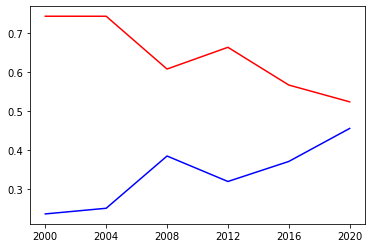

In [24]:
plt.plot(crRed.year.astype(str), crRed.RepublicanPercent, 'r', crBlue.year.astype(str), crBlue.DemocratPercent, 'b')